In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#importing the credit classification dataset
df = pd.read_csv('Dataset/train.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_17164\3127660354.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset/train.csv')


In [21]:
#taking a look at the number of rows and columns
df.shape

(100000, 28)

In [22]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [24]:
#checking if there are any null values
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [25]:
#since 'Credit_Score' is out target column, let's see the unique values there and what percentage each of them contributes 
df1 = df.drop(["ID","Customer_ID","Month","Name","Occupation","Type_of_Loan","Payment_of_Min_Amount","Total_EMI_per_month","Amount_invested_monthly","SSN"],axis=1)

In [26]:
#let's get a list of all the columns
df1 = df1.dropna()

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69646 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       69646 non-null  object 
 1   Annual_Income             69646 non-null  object 
 2   Monthly_Inhand_Salary     69646 non-null  float64
 3   Num_Bank_Accounts         69646 non-null  int64  
 4   Num_Credit_Card           69646 non-null  int64  
 5   Interest_Rate             69646 non-null  int64  
 6   Num_of_Loan               69646 non-null  object 
 7   Delay_from_due_date       69646 non-null  int64  
 8   Num_of_Delayed_Payment    69646 non-null  object 
 9   Changed_Credit_Limit      69646 non-null  object 
 10  Num_Credit_Inquiries      69646 non-null  float64
 11  Credit_Mix                69646 non-null  object 
 12  Outstanding_Debt          69646 non-null  object 
 13  Credit_Utilization_Ratio  69646 non-null  float64
 14  Credit_Hist

In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df["Age"].apply(is_float)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34_,#F%$D@*&8,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,30_,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,24_,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
89,0x1687,CUS_0xc0ab,February,Soyoungd,33_,342-90-2649,Engineer,88640.24,7266.686667,3,...,Good,950.36,41.036168,25 Years and 6 Months,NM,135.173371,157.174788304235,High_spent_Large_value_payments,674.3205073907143,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99908,0x25f66,CUS_0xa053,May,t Astridn,4808_,094-81-5856,Writer,87695.34,7337.945000,2,...,Good,361.68,28.147193,19 Years and 5 Months,No,65671.000000,168.79878418602146,High_spent_Large_value_payments,804.995716,Standard
99922,0x25f7c,CUS_0x2654,March,enj,38_,647-67-8889,Media_Manager,139664.96_,11777.746667,3,...,Standard,365.66,35.828569,29 Years and 9 Months,Yes,423.731016,124.13474999025516,High_spent_Large_value_payments,869.908901,Standard
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38_,546-94-4789,Manager,15319.65,1460.637500,6,...,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48_,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor


In [29]:
def convert_to_Float(x):
    age = list(x.split("_"))
    return float(age[0])

df1["Age"] =df1["Age"].apply(convert_to_Float)

In [30]:
df1 = df1[df1["Age"] >= 10]
df1 = df1[df1["Age"] <= 100]

In [31]:
df1.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio
count,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000
mean,33.318457,4159.880590,16.952165,22.649431,73.589863,21.088813,27.196557,32.335110
std,10.778251,3166.790203,116.732113,129.296426,471.662574,14.845142,190.063847,5.106689
min,14.000000,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250
25%,24.000000,1622.209167,3.000000,4.000000,8.000000,10.000000,3.000000,28.110903
50%,33.000000,3062.501667,6.000000,6.000000,13.000000,18.000000,6.000000,32.372503
75%,42.000000,5913.250000,7.000000,7.000000,20.000000,28.000000,9.000000,36.536364
max,100.000000,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,50.000000


In [32]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67670 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       67670 non-null  float64
 1   Annual_Income             67670 non-null  object 
 2   Monthly_Inhand_Salary     67670 non-null  float64
 3   Num_Bank_Accounts         67670 non-null  int64  
 4   Num_Credit_Card           67670 non-null  int64  
 5   Interest_Rate             67670 non-null  int64  
 6   Num_of_Loan               67670 non-null  object 
 7   Delay_from_due_date       67670 non-null  int64  
 8   Num_of_Delayed_Payment    67670 non-null  object 
 9   Changed_Credit_Limit      67670 non-null  object 
 10  Num_Credit_Inquiries      67670 non-null  float64
 11  Credit_Mix                67670 non-null  object 
 12  Outstanding_Debt          67670 non-null  object 
 13  Credit_Utilization_Ratio  67670 non-null  float64
 14  Credit_Hist

In [33]:

df1[~df1["Annual_Income"].apply(is_float)]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score
10,28.0,34847.84_,3037.986667,2,1385,6,1,3,-1,5.42,2.0,_,605.03,33.224951,26 Years and 9 Months,High_spent_Large_value_payments,466.46647639764313,Standard
27,55.0,30689.89_,2612.490833,2,5,4,1,7,6,-2.01,4.0,Good,632.46,38.132348,17 Years and 6 Months,Low_spent_Small_value_payments,262.4995942778403,Standard
111,39.0,8701.545_,519.128750,6,5,32,7,23,9,8.86,9.0,Standard,2602.69,28.815537,9 Years and 6 Months,Low_spent_Small_value_payments,264.7720511316515,Poor
129,20.0,92047.08_,7591.590000,6,7,16,0,16,11,9.13,4.0,Standard,1296.64,39.467758,29 Years and 3 Months,Low_spent_Medium_value_payments,328.66361932701284,Standard
151,26.0,97791.42_,7449.469347,6,6,12,0,18,8,17.92,1.0,Standard,107.41,33.894443,27 Years and 9 Months,High_spent_Medium_value_payments,947.6102963746632,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99921,38.0,139664.96_,11777.746667,3,6,12,4,14,12,12.39,8.0,Standard,365.66,40.171095,29 Years and 8 Months,High_spent_Medium_value_payments,582.724785,Standard
99922,38.0,139664.96_,11777.746667,3,6,12,4,14,12,12.39,8.0,Standard,365.66,35.828569,29 Years and 9 Months,High_spent_Large_value_payments,869.908901,Standard
99959,21.0,38321.39_,3106.647859,4,4,3,4,6,7,1.59,6.0,_,678.57,28.951691,17 Years and 6 Months,Low_spent_Medium_value_payments,242.038135,Standard
99981,50.0,37188.1_,3097.008333,1,4,5,3,5,12,5.38,3.0,Good,620.64,37.753013,30 Years and 2 Months,Low_spent_Small_value_payments,368.154976,Good


In [34]:
df1["Annual_Income"] =df1["Annual_Income"].apply(convert_to_Float)

In [35]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio
count,67670.000000,6.767000e+04,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000
mean,33.318457,1.771887e+05,4159.880590,16.952165,22.649431,73.589863,21.088813,27.196557,32.335110
std,10.778251,1.443350e+06,3166.790203,116.732113,129.296426,471.662574,14.845142,190.063847,5.106689
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250
25%,24.000000,1.939573e+04,1622.209167,3.000000,4.000000,8.000000,10.000000,3.000000,28.110903
50%,33.000000,3.698236e+04,3062.501667,6.000000,6.000000,13.000000,18.000000,6.000000,32.372503
75%,42.000000,7.225071e+04,5913.250000,7.000000,7.000000,20.000000,28.000000,9.000000,36.536364
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,50.000000


In [36]:
bins = [df1['Annual_Income'].quantile(0), df1['Annual_Income'].quantile(0.2), df1['Annual_Income'].quantile(0.4),
        df1['Annual_Income'].quantile(0.6), df1['Annual_Income'].quantile(0.8), df1['Annual_Income'].quantile(1)]

labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df1['Salary_Range'] = pd.cut(df1['Annual_Income'], bins=bins, labels=labels)

df1


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Salary_Range
0,23.0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,High_spent_Small_value_payments,312.49408867943663,Good,Low
6,23.0,19114.12,1824.843333,3,4,3,4,3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,Low_spent_Small_value_payments,244.5653167062043,Good,Low
8,28.0,34847.84,3037.986667,2,4,6,1,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,Low_spent_Small_value_payments,470.69062692529184,Standard,Medium
9,28.0,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,High_spent_Large_value_payments,484.5912142650067,Good,Medium
10,28.0,34847.84,3037.986667,2,1385,6,1,3,-1,5.42,2.0,_,605.03,33.224951,26 Years and 9 Months,High_spent_Large_value_payments,466.46647639764313,Standard,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2,20,6,9.5,3.0,_,502.38,39.323569,31 Years and 5 Months,High_spent_Medium_value_payments,410.256158,Poor,Medium
99995,25.0,39628.99,3359.415833,4,6,7,2,23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,High_spent_Large_value_payments,479.866228,Poor,Medium
99996,25.0,39628.99,3359.415833,4,6,7,2,18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,High_spent_Medium_value_payments,496.65161,Poor,Medium
99997,25.0,39628.99,3359.415833,4,6,5729,2,27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,High_spent_Large_value_payments,516.809083,Poor,Medium


C:\Users\HP\AppData\Local\Temp\ipykernel_17164\317636627.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df1, values='Annual_Income', index='Salary_Range', columns='Credit_Score', aggfunc='count', fill_value=0)


Credit_Score  Good  Poor  Standard
Salary_Range                      
Very Low      1201  5539      6791
Low           2057  3936      7541
Medium        2851  3855      6831
High          1866  4373      7290
Very High     3966  1948      7620


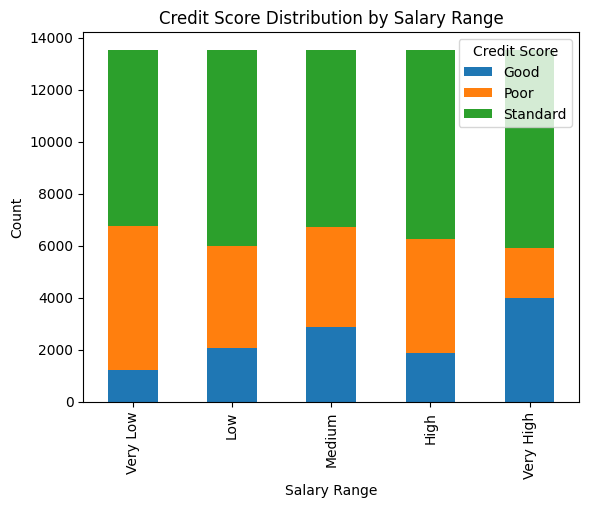

In [37]:
pivot_table = pd.pivot_table(df1, values='Annual_Income', index='Salary_Range', columns='Credit_Score', aggfunc='count', fill_value=0)

print(pivot_table)
#Plot a bar graph
pivot_table.plot(kind='bar', stacked=True)
plt.title('Credit Score Distribution by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

In [38]:
df2 = df1[df1["Annual_Income"] < 12*df1["Monthly_Inhand_Salary"]]

In [39]:

df2.groupby("Credit_Score")["Credit_Score"].agg("count")

Credit_Score
Good         5685
Poor         9710
Standard    17391
Name: Credit_Score, dtype: int64

In [40]:
df1["Num_Bank_Accounts"] = df1["Num_Bank_Accounts"].apply(lambda x: abs(x) if x !=0 else x+1)

In [41]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio
count,67670.000000,6.767000e+04,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000,67670.000000
mean,33.318457,1.771887e+05,4159.880590,16.995655,22.649431,73.589863,21.088813,27.196557,32.335110
std,10.778251,1.443350e+06,3166.790203,116.725973,129.296426,471.662574,14.845142,190.063847,5.106689
min,14.000000,7.005930e+03,303.645417,1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250
25%,24.000000,1.939573e+04,1622.209167,3.000000,4.000000,8.000000,10.000000,3.000000,28.110903
50%,33.000000,3.698236e+04,3062.501667,6.000000,6.000000,13.000000,18.000000,6.000000,32.372503
75%,42.000000,7.225071e+04,5913.250000,7.000000,7.000000,20.000000,28.000000,9.000000,36.536364
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,50.000000


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67670 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       67670 non-null  float64 
 1   Annual_Income             67670 non-null  float64 
 2   Monthly_Inhand_Salary     67670 non-null  float64 
 3   Num_Bank_Accounts         67670 non-null  int64   
 4   Num_Credit_Card           67670 non-null  int64   
 5   Interest_Rate             67670 non-null  int64   
 6   Num_of_Loan               67670 non-null  object  
 7   Delay_from_due_date       67670 non-null  int64   
 8   Num_of_Delayed_Payment    67670 non-null  object  
 9   Changed_Credit_Limit      67670 non-null  object  
 10  Num_Credit_Inquiries      67670 non-null  float64 
 11  Credit_Mix                67670 non-null  object  
 12  Outstanding_Debt          67670 non-null  object  
 13  Credit_Utilization_Ratio  67670 non-null  float64 


In [ ]:
df1["Num_of_Loan"] =df1["Num_of_Loan"].apply(convert_to_Float)
df1["Num_of_Delayed_Payment"] = df1["Num_of_Delayed_Payment"].apply(convert_to_Float)

In [ ]:
df1["Changed_Credit_Limit"].replace("_","0",inplace=True)
df1["Changed_Credit_Limit"] = df1["Changed_Credit_Limit"].apply(convert_to_Float)


In [ ]:
df1["Credit_Mix"].replace("_","Standard",inplace=True)
credit_mix = {"Good":0,"Standard":1,"Bad":2}
df1["Credit_Mix"].replace(credit_mix,inplace=True)

In [102]:
def get_year(x):
    x = x.split()
    return int(x[0])
def get_month(x):
    x = x.split()
    return int(x[3])

In [ ]:
credit_score = {"Good":0,"Standard":1,"Poor":2}
df1["Credit_Score"].replace(credit_score,inplace=True)

In [ ]:
df1 = df1[df1["Payment_Behaviour"]!="!@9#%8"]

In [55]:
df1["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [56]:
payment_behavior_dict = {
    'High_spent_Small_value_payments': 0,
    'Low_spent_Small_value_payments': 1,
    'High_spent_Large_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'Low_spent_Medium_value_payments': 5
}

df1["Payment_Behaviour"].replace(payment_behavior_dict,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17164\1810052688.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Payment_Behaviour"].replace(payment_behavior_dict,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17164\1810052688.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Paym

In [57]:
df1["Salary_Range"]

0           Low
6           Low
8        Medium
9        Medium
10       Medium
          ...  
99991       Low
99994    Medium
99995    Medium
99996    Medium
99997    Medium
Name: Salary_Range, Length: 62603, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [58]:

df1.isna().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Salary_Range                5
Credit_History_Year         0
Credit_History_Month        0
dtype: int64

In [106]:
df1 = df1.dropna()

In [107]:
salary_range_dict = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df1["Salary_Range"].replace(salary_range_dict,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17164\1027316294.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Salary_Range"].replace(salary_range_dict,inplace=True)


In [61]:
df1 = df1[df1["Monthly_Balance"].apply(is_float)]
# df1["Monthly_Balance"].apply(convert_to_Float)

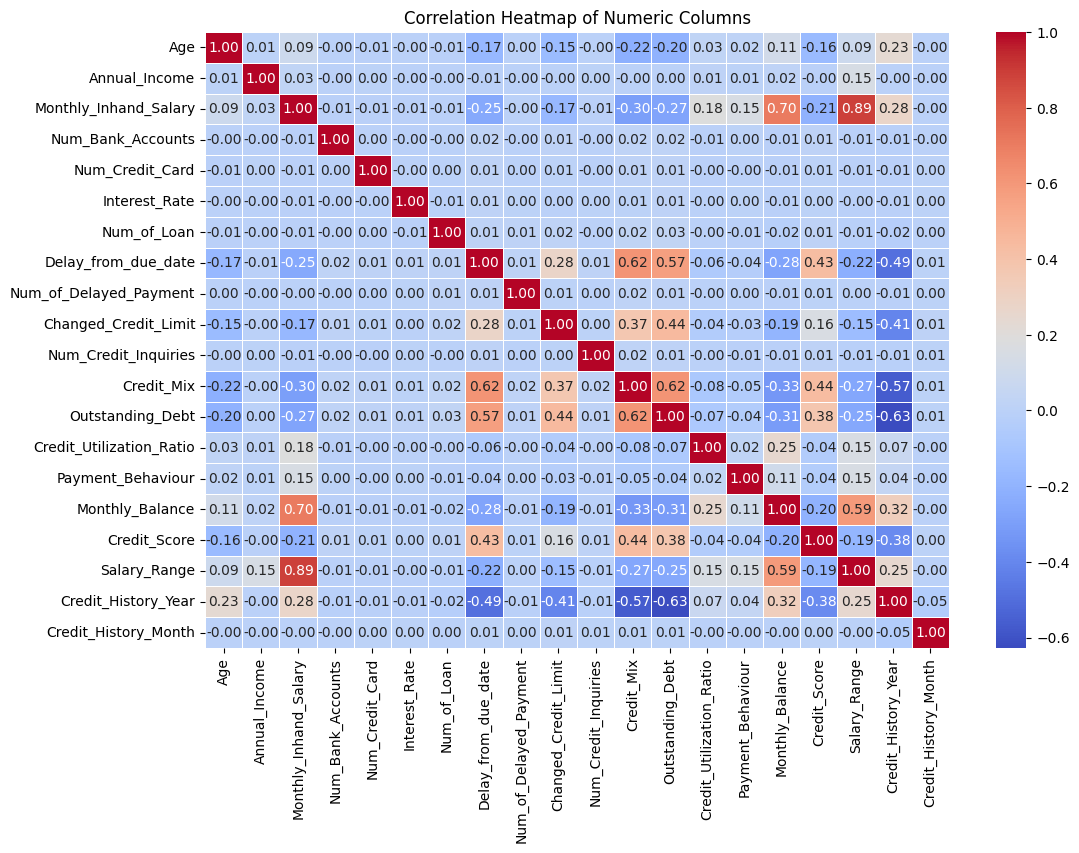

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the numeric columns
# Extract the numeric columns you want to include in the heatmap
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

X = df1.drop("Credit_Score",axis=1)
y = df1["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.30, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
rf.score(X_test,y_test)

0.7322317067603962

In [66]:
df1.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Salary_Range', 'Credit_History_Year',
       'Credit_History_Month'],
      dtype='object')

In [67]:
X = df1[["Credit_History_Year", "Salary_Range", "Outstanding_Debt", "Credit_Mix", "Changed_Credit_Limit", "Delay_from_due_date","Age"]]
y = df1["Credit_Score"]

In [68]:

df1.dropna(inplace=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.30, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
rf.score(X_test,y_test)

0.7059615647966403

In [72]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

predictions = rf.predict(X_test)
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

           0       0.60      0.56      0.58      7723
           1       0.73      0.76      0.75     23416
           2       0.72      0.69      0.70     12675

    accuracy                           0.71     43814
   macro avg       0.68      0.67      0.68     43814
weighted avg       0.70      0.71      0.70     43814



Confusion Matrix [[ 4324  3127   272]
 [ 2416 17880  3120]
 [  475  3473  8727]]


Accuracy Score 0.7059615647966403


In [73]:
df1.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Salary_Range', 'Credit_History_Year',
       'Credit_History_Month'],
      dtype='object')

In [74]:
X = df1[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Year", "Monthly_Balance"]]
y = df1['Credit_Score']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
model = RandomForestClassifier(n_estimators=30, class_weight='balanced')

In [77]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30)

In [78]:
# Making predictions on our model using the test data
predictions = model.predict(X_test)

In [79]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

           0       0.70      0.64      0.67      3651
           1       0.76      0.79      0.78     11066
           2       0.76      0.74      0.75      5939

    accuracy                           0.75     20656
   macro avg       0.74      0.72      0.73     20656
weighted avg       0.75      0.75      0.75     20656



Confusion Matrix [[2336 1274   41]
 [ 923 8792 1351]
 [ 102 1450 4387]]


Accuracy Score 0.7511134779240899


In [80]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42, stratify=y_sm)

In [85]:
model = RandomForestClassifier(n_estimators=50, class_weight='balanced')
model.fit(X_train, y_train)
# Making predictions on our model using the test data
predictions = model.predict(X_test)

print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

           0       0.86      0.92      0.89     11017
           1       0.79      0.75      0.77     11017
           2       0.77      0.75      0.76      6000

    accuracy                           0.82     28034
   macro avg       0.81      0.81      0.81     28034
weighted avg       0.81      0.82      0.81     28034



Confusion Matrix [[10085   895    37]
 [ 1385  8310  1322]
 [  254  1266  4480]]


Accuracy Score 0.8159734607976029


In [94]:
import joblib

joblib.dump(model,"model/model_v2.joblib")

['model/model_v2.joblib']

In [95]:
df2 = df1[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Year", "Monthly_Balance"]]

In [96]:
df2.to_csv("Dataset/new.csv")

In [97]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62591 entries, 0 to 99997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual_Income           62591 non-null  float64
 1   Monthly_Inhand_Salary   62591 non-null  float64
 2   Num_Bank_Accounts       62591 non-null  int64  
 3   Num_Credit_Card         62591 non-null  int64  
 4   Interest_Rate           62591 non-null  int64  
 5   Num_of_Loan             62591 non-null  float64
 6   Delay_from_due_date     62591 non-null  int64  
 7   Num_of_Delayed_Payment  62591 non-null  float64
 8   Credit_Mix              62591 non-null  int64  
 9   Outstanding_Debt        62591 non-null  float64
 10  Credit_History_Year     62591 non-null  int64  
 11  Monthly_Balance         62591 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 6.2+ MB
